In [1]:
import sys
import os
from typing import List, Dict, Tuple, Any

eval_folder_paths = [
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_MAB", ## ours
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_AllAugRandSample",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_No_aug",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_Shuffle",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandPush_5_10",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_SelfSampledpush",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace1e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace2e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace3e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace4e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace5e-1",
]
config_paths = [os.path.join(eval_folder_path, "config.yaml") for eval_folder_path in eval_folder_paths]
print_log_paths = [os.path.join(eval_folder_path, "exp_print.log") for eval_folder_path in eval_folder_paths]
evaluation_log_paths = [os.path.join(eval_folder_path, "eval_results.log") for eval_folder_path in eval_folder_paths]

our_method_folder_path = eval_folder_paths[0]
our_method_config_path = config_paths[0]
our_method_print_log_path = print_log_paths[0]
our_method_evaluation_log_path = evaluation_log_paths[0]

## Amazon Beauty Run Paths
"""
eval_folder_paths = [
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/Amazon_Beauty_8000_Round_Eval_result_for_method_1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_No_aug",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_Shuffle",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandPush_5_10",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_SelfSampledpush",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace1e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace2e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace3e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace4e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace5e-1",
]  
"""  

'\neval_folder_paths = [\n    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/Amazon_Beauty_8000_Round_Eval_result_for_method_1",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_No_aug",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_Shuffle",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandPush_5_10",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_SelfSampledpush",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace1e-1",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace2e-1",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace3e-1",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace4e-1",\n    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace5e-1",\n]  \n'

In [2]:
def load_log_file(file_path : str) -> str:
    """
    Load the log file and return the content as string.
    """
    with open(file_path, 'r') as file:
        log_content = file.read()
    
    return log_content

In [3]:
import ast
import numpy as np
import re

def parse_print_log_into_list_of_dicts(log_content : str, max_content_num : int) -> List[Dict[str, Any]]:
    """
    Parse the print log content into a list of dictionaries.
    """
    ## if key the line has '(client:354)' or '(sr_sybil_attack_server:560)' then that line is a hit
    local_train_report = []
    for line in log_content.split('\n') :
        if '(client:354)' in line or '(sr_sybil_attack_server:579)' in line or '(shadow_client_and_server:700)' in line or '(shadow_client_and_server:723)' in line or '(shadow_client_and_server:857)' in line :
            local_train_report.append(line)

    refined_local_results_for_ours = []

    cnt = 0
    for local_result in local_train_report :
        if len(refined_local_results_for_ours) == max_content_num :
            break
        refined_str = local_result.split('INFO: ')[1]
        refined_dict = ast.literal_eval(refined_str)
        refined_local_results_for_ours.append(refined_dict)
        cnt += 1

    return refined_local_results_for_ours

def parse_client_id(role : str) -> int :
    """
    Parse the client id from the role string such as 'Client #593'.
    """
    return int(role.split('#')[1])


def get_avg_and_std_train_loss_per_round(local_results : List[Dict[str, Any]], max_round : int) -> Tuple[List[float], List[float]]:
    """
    Get the average and standard deviation of the training loss per round.
    """
    train_losses= []
    for local_result in local_results:
        train_losses.append(local_result['Results_raw']['train_avg_loss'])
    
    ## each round contains 16 clients
    
    train_losses = np.array(train_losses).reshape(-1, 16)
    avg_train_loss_per_round = np.mean(train_losses, axis=1)
    std_train_loss_per_round = np.std(train_losses, axis=1)
    
    return avg_train_loss_per_round, std_train_loss_per_round



#local_results = log_content.split('(client:354)')[1:]


200703854


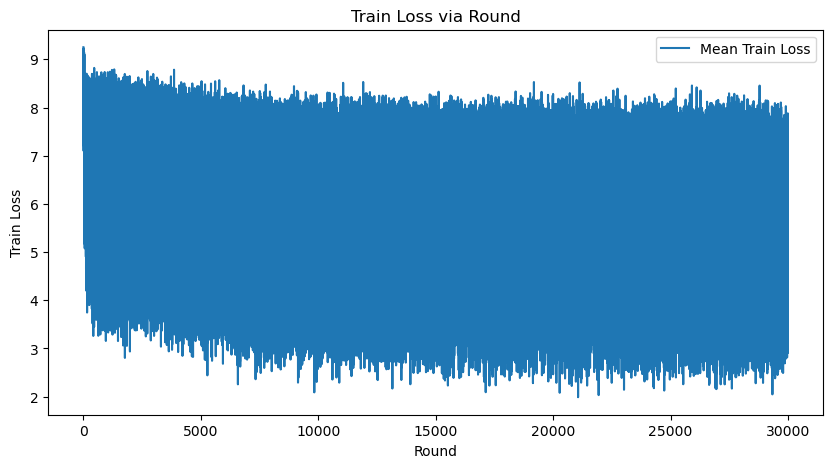

In [4]:

log_content = load_log_file(our_method_print_log_path)
print(len(log_content))

refined_local_results_for_ours = parse_print_log_into_list_of_dicts(log_content, 480000)
ours_avg_train_loss_per_round, ours_std_train_loss_per_round = get_avg_and_std_train_loss_per_round(refined_local_results_for_ours, 30000)

## Plot the training loss per round
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ours_avg_train_loss_per_round, label='Mean Train Loss')

#plt.fill_between(range(len(mean_train_loss_via_round)), mean_train_loss_via_round - std_train_loss_via_round, mean_train_loss_via_round + std_train_loss_via_round, alpha=0.2)
plt.title('Train Loss via Round')
plt.xlabel('Round')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

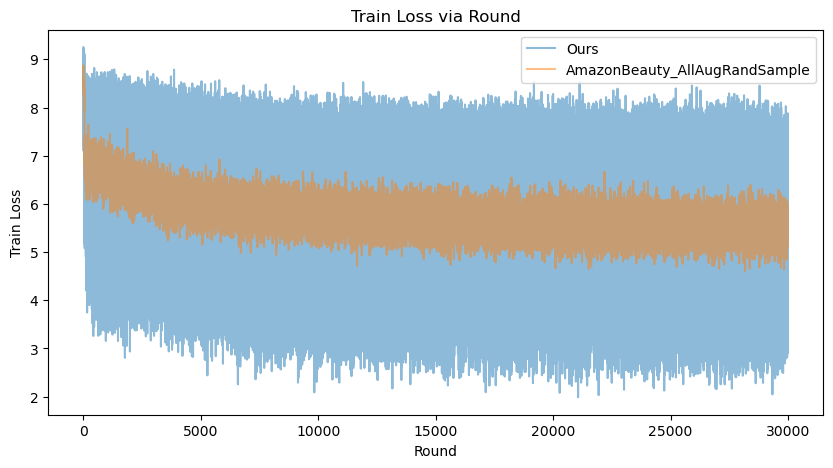

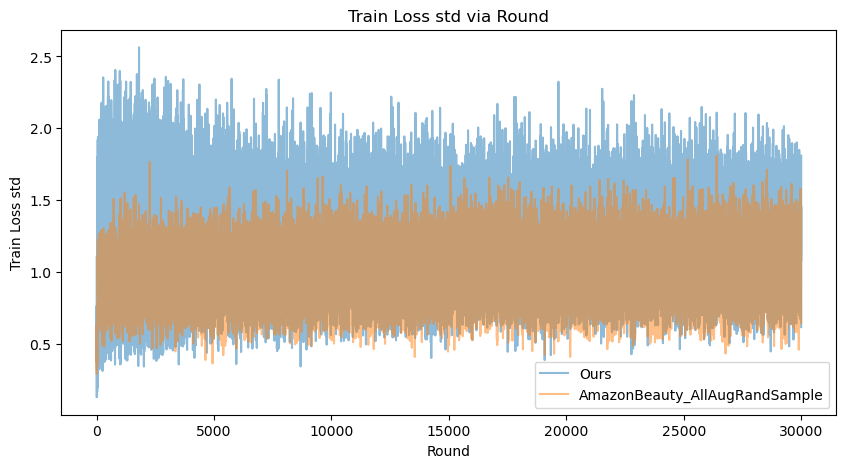

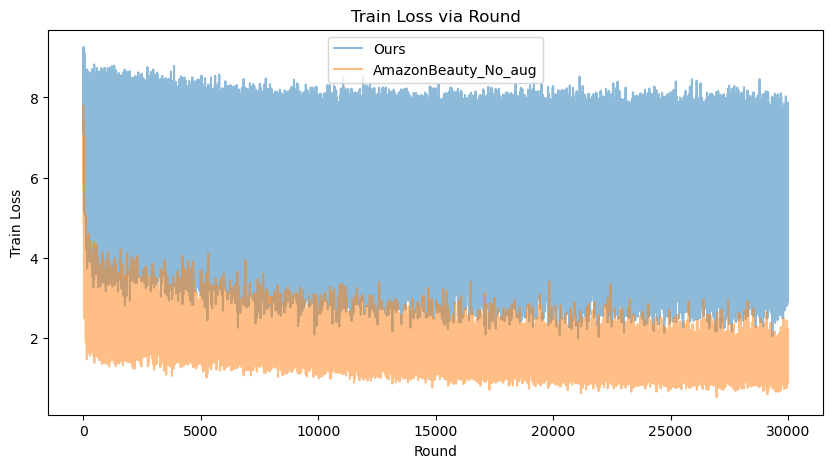

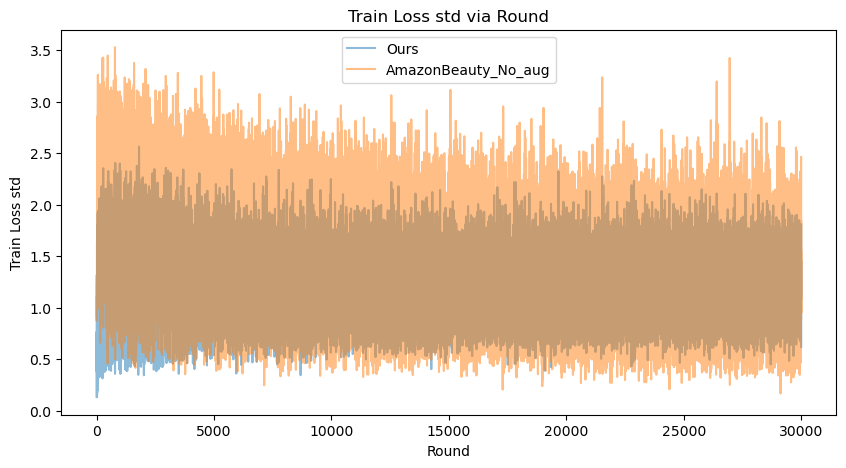

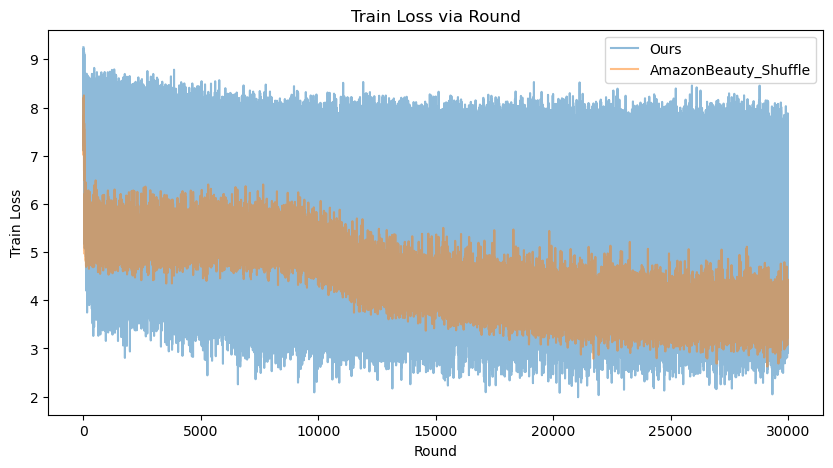

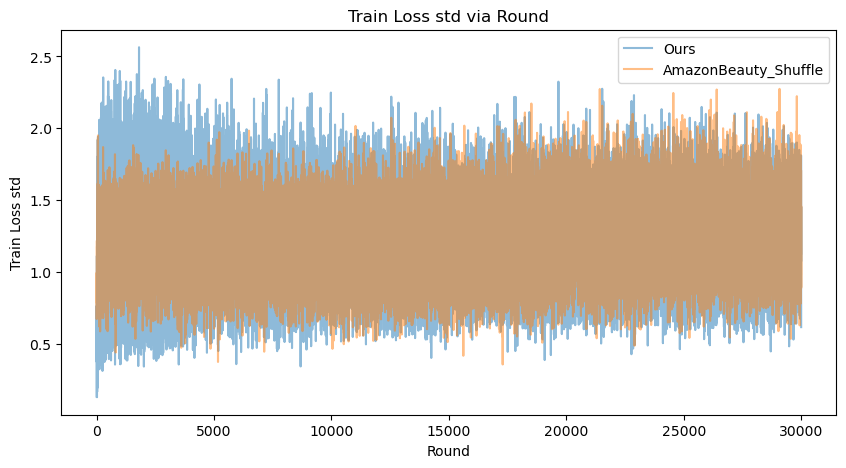

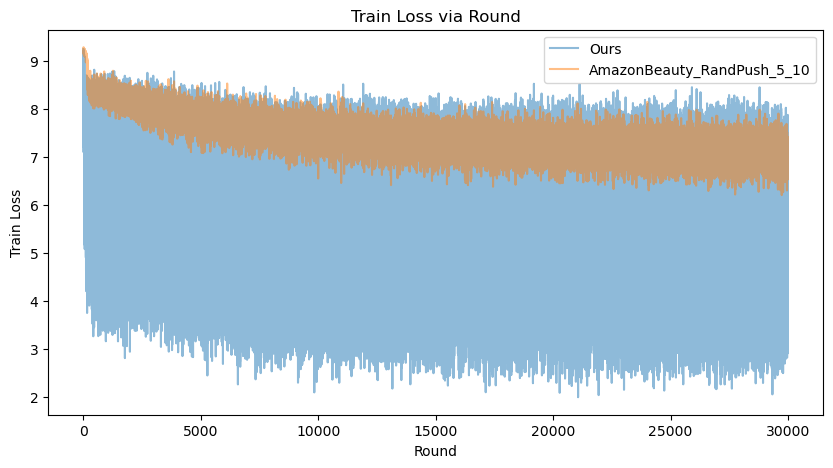

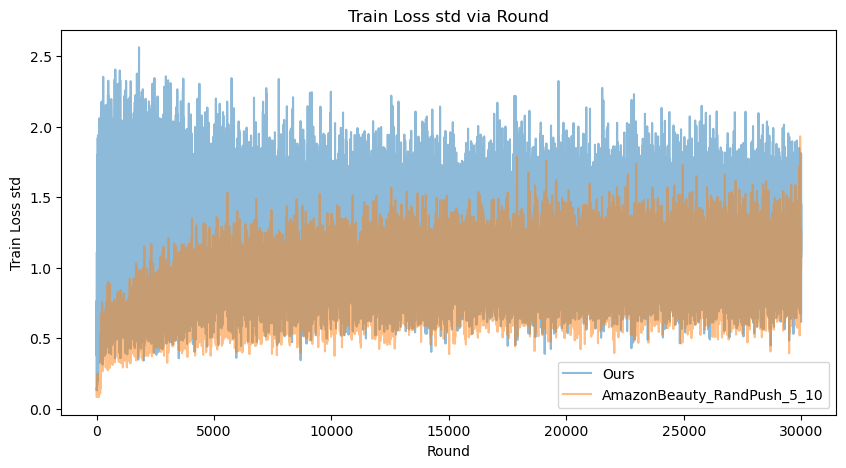

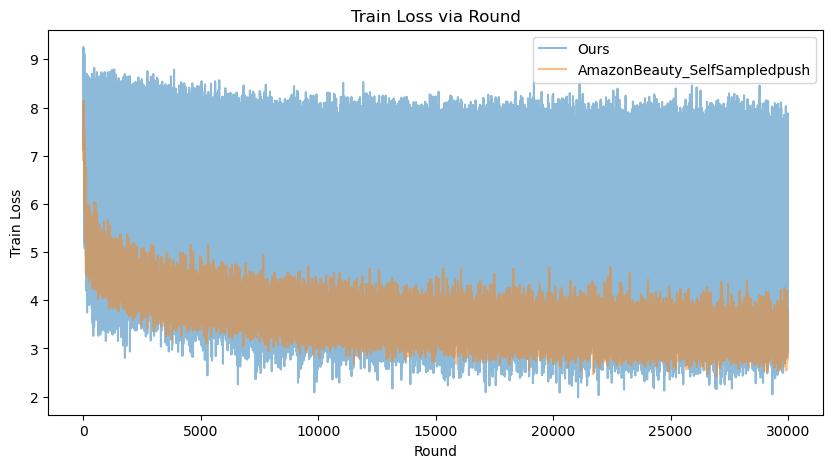

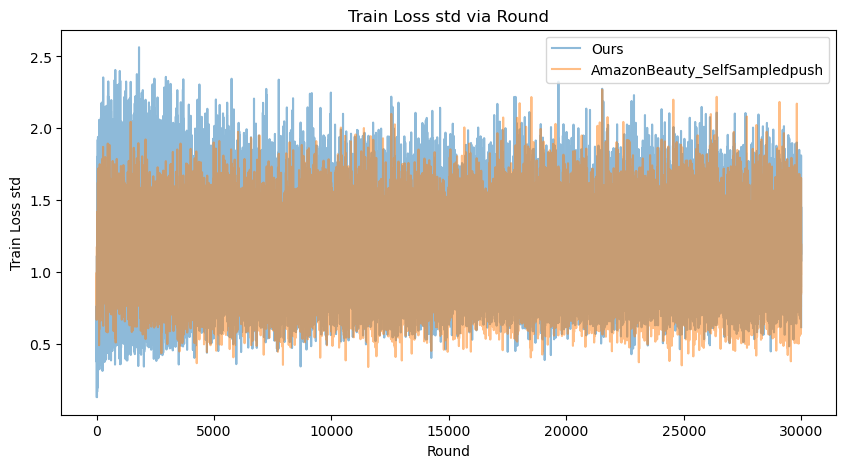

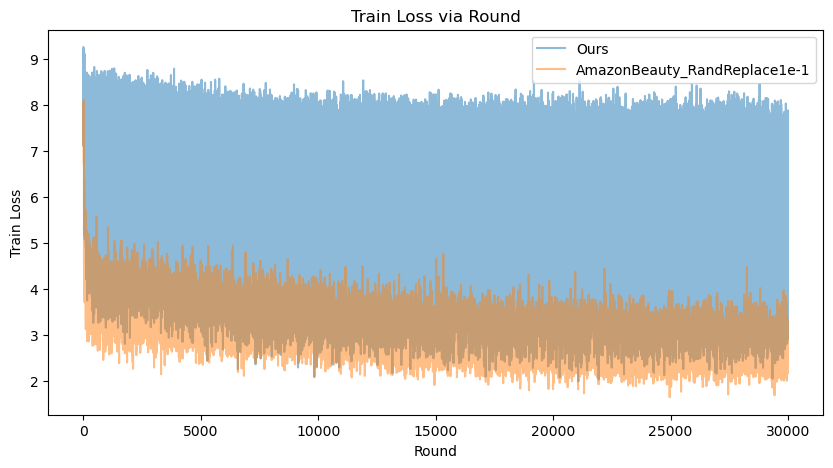

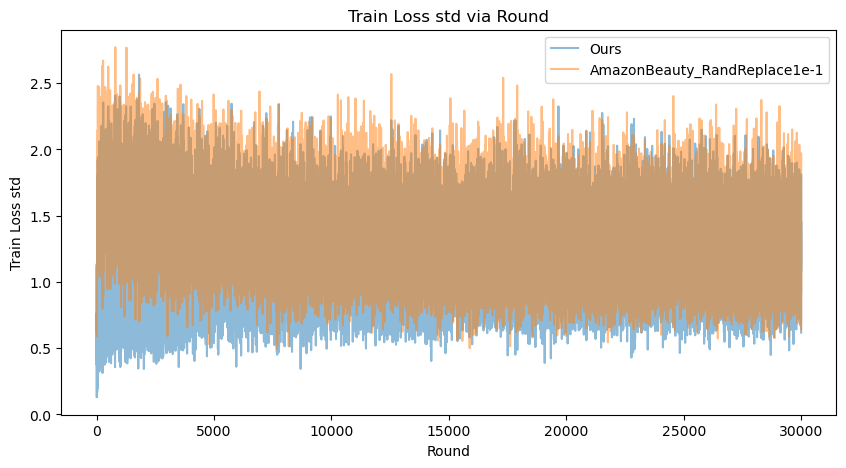

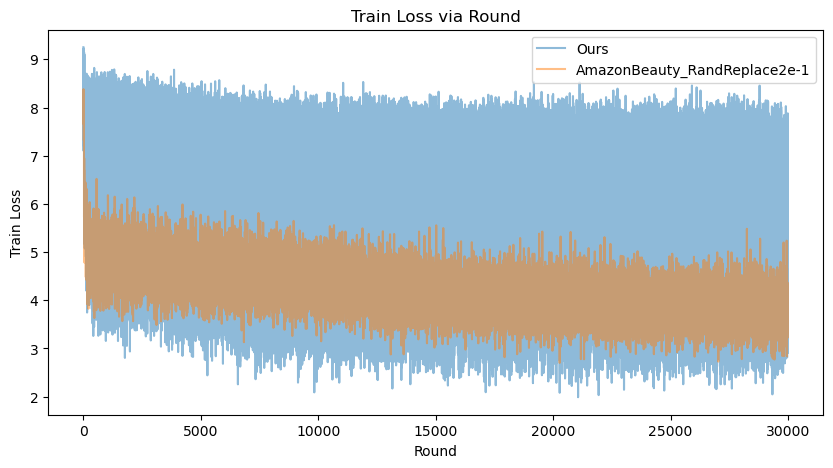

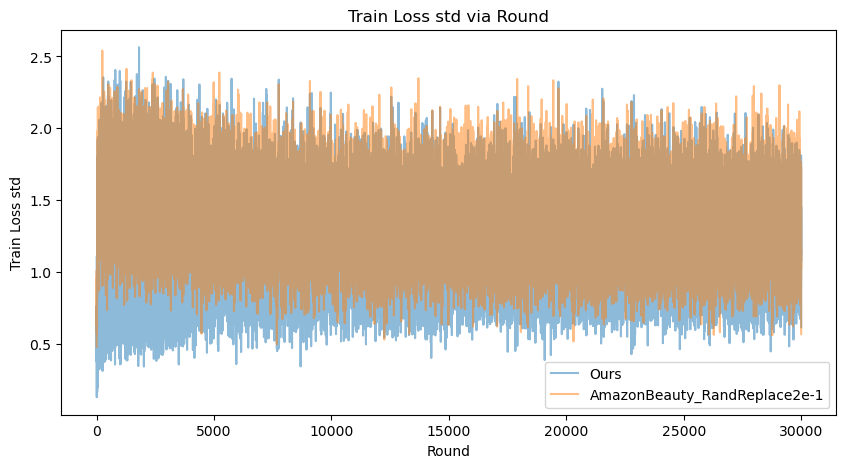

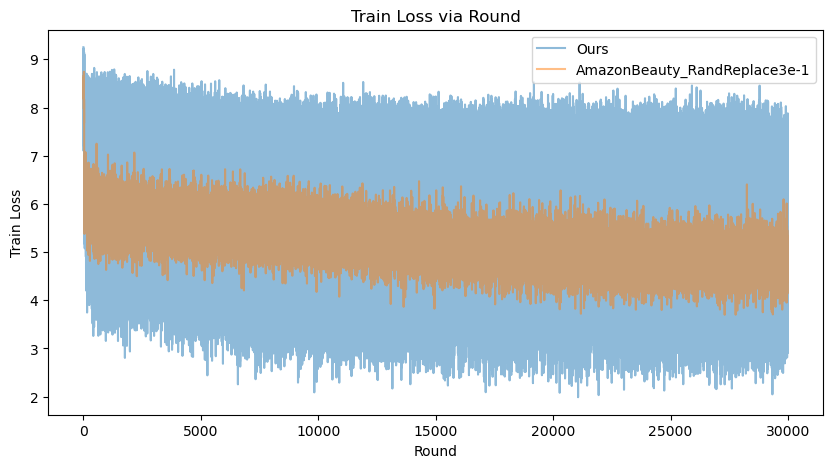

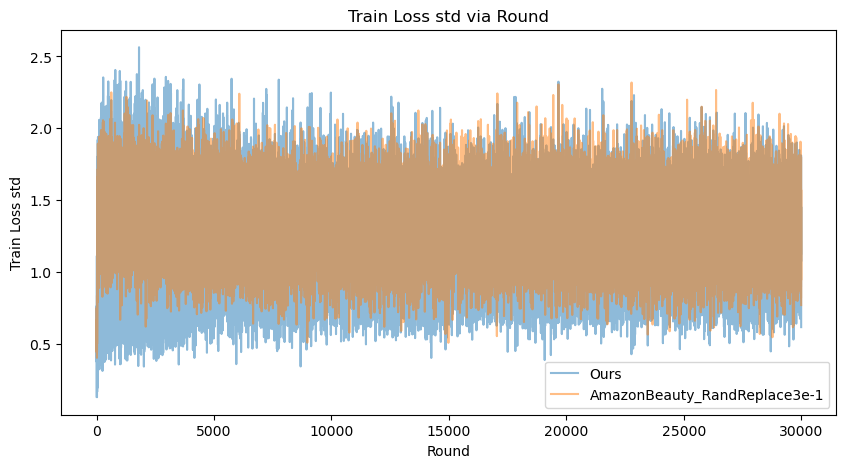

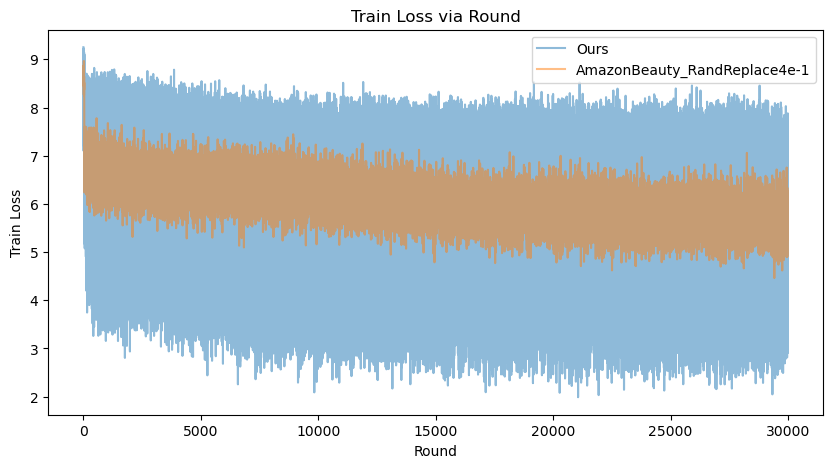

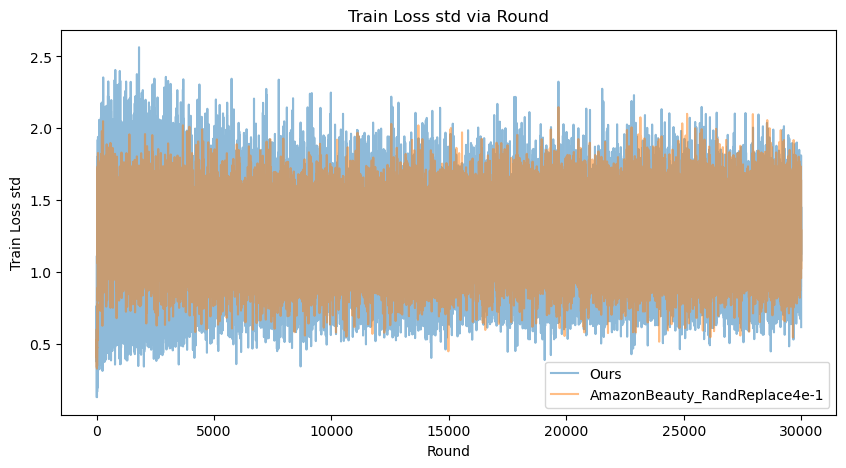

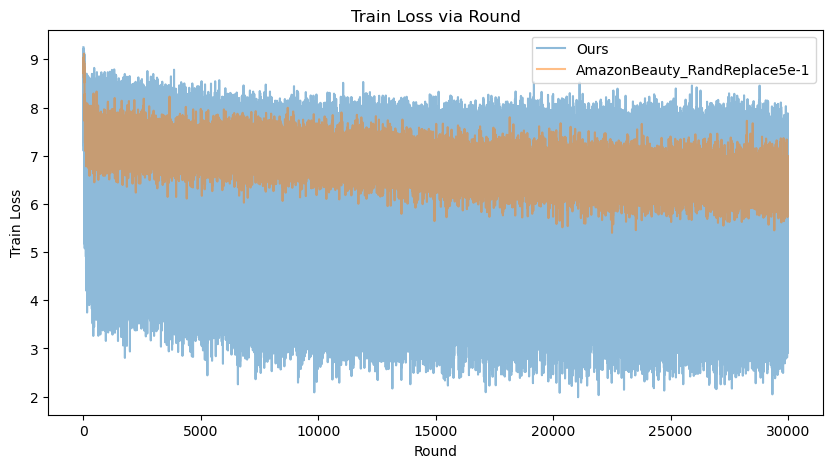

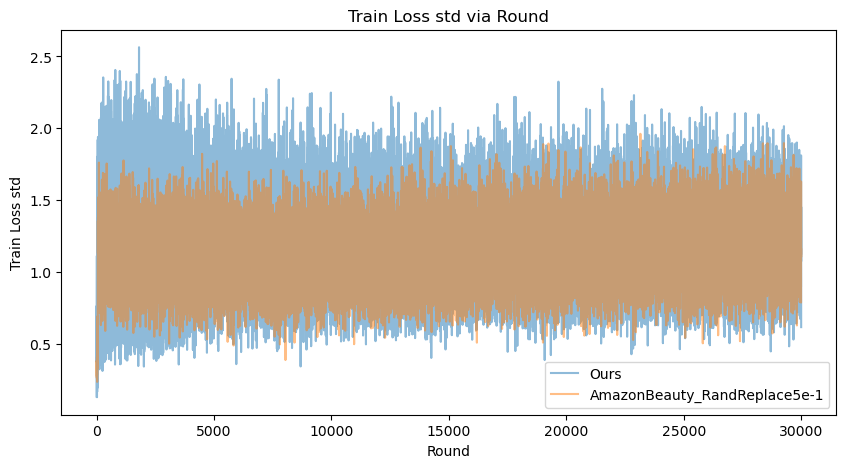

In [5]:
## now compare with other aug methods
## 1 v 1 style {ours vs aug method}

for idx, print_log in enumerate(print_log_paths[1:]):
    log_content = load_log_file(print_log)
    refined_local_results = parse_print_log_into_list_of_dicts(log_content, 480000)
    avg_train_loss_per_round, std_train_loss_per_round = get_avg_and_std_train_loss_per_round(refined_local_results, 30000)
    
    ## with transparency
    plt.figure(figsize=(10, 5))
    plt.plot(ours_avg_train_loss_per_round, label='Ours', alpha=0.5)
    plt.plot(avg_train_loss_per_round, label=eval_folder_paths[idx+1].split('/')[-1], alpha = 0.5)
    plt.title('Train Loss via Round')
    plt.xlabel('Round')
    plt.ylabel('Train Loss')
    plt.legend()
    
    plt.show()
    
    ## also stds
    plt.figure(figsize=(10, 5))
    plt.plot(ours_std_train_loss_per_round, label='Ours', alpha=0.5)
    plt.plot(std_train_loss_per_round, label=eval_folder_paths[idx+1].split('/')[-1], alpha = 0.5)
    
    plt.title('Train Loss std via Round')
    plt.xlabel('Round')
    plt.ylabel('Train Loss std')
    plt.legend()
    
    plt.show()
    

    